# Задание 1

Обучить Агента решать Acrobot-v1, MountainCar-v0, или LunarLander-v2 (одну на выбор) методом DQN. Найти оптимальные гиперпараметры. Сравнить с алгоритмом Deep Cross-Entropy на графиках. Помним про корректность сравнения.

В данной работе рассматривается Acrobot-v1.

In [55]:
import pandas as pd
df = pd.read_csv("task1.csv")
df["algorithm"] = "DQN"
df.head()

,epoch,reward,algorithm
0,0,-497.92,DQN
1,100,-110.88,DQN
2,200,-95.57,DQN
3,300,-494.43,DQN
4,400,-104.91,DQN


In [56]:
dce = pd.read_csv("../week2/task1.csv")
dce = dce[(dce["quantile"] == 0.9)&(dce["trajectories"] == 1000)&(dce["epoch"] < 6)]
dce = dce[["epoch", "reward"]]
dce["epoch"] = dce["epoch"].apply(lambda x: 1000 * x)
dce["algorithm"] = "Deep cross-entropy"
dce.head()

,epoch,reward,algorithm
700,0,-456.46,Deep cross-entropy
701,1000,-241.02,Deep cross-entropy
702,2000,-137.90,Deep cross-entropy
703,3000,-100.79,Deep cross-entropy
704,4000,-87.24,Deep cross-entropy


In [57]:
df = pd.concat([df, dce], ignore_index=True)
df.head()

,epoch,reward,algorithm
0,0,-497.92,DQN
1,100,-110.88,DQN
2,200,-95.57,DQN
3,300,-494.43,DQN
4,400,-104.91,DQN


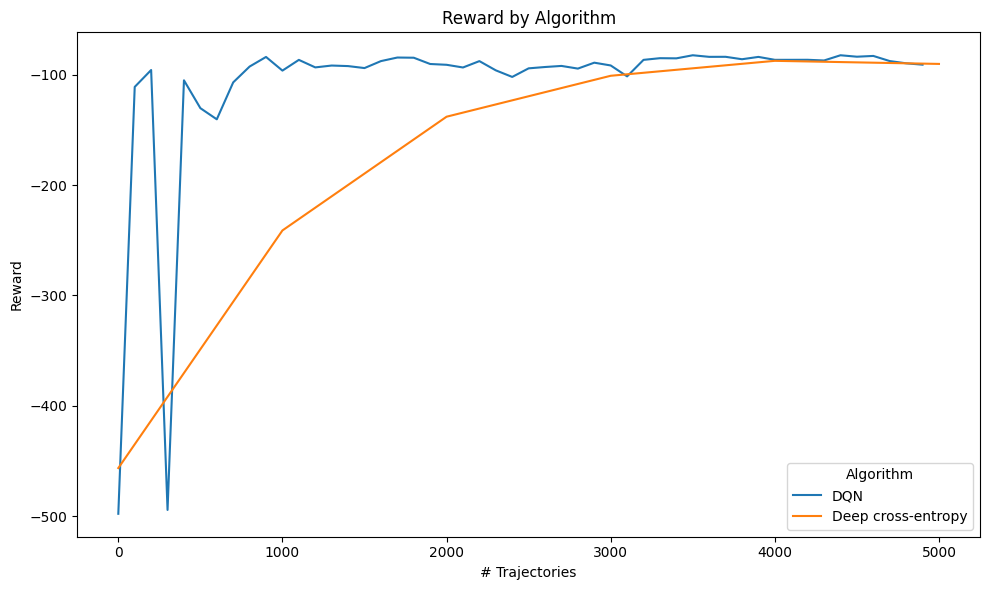

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='epoch', y='reward', hue='algorithm', markers=True)

# Set axis labels and title
plt.xlabel('# Trajectories')
plt.ylabel('Reward')
plt.title('Reward by Algorithm')

# Show legend
plt.legend(title='Algorithm')

# Show the plot
plt.tight_layout()
plt.show()

Для корректности сравнения графики построены в зависимости от количества траекторий, поэтому в методе кросс энтропии точки для каждой 1000 траекторий (размер популяции). Сети для обучение обоих алгоритмов имеют одинаковую архитектуру и параметры обучения. Из графика видно, что алгоритм DQN сходится к оптимальному значению существенно быстрее, и после 1000 итераций уже стабильно решает задачу. Для кросс энтропии 1000 траекторий это только одна итерация и решения среды ещё нет.

**Результат**:
* DQN сходится намного быстрее метода кросс энтропии.

In [49]:
df2 = pd.read_csv("task2.csv")
df2.head()

,epoch,reward,type
0,0,-500.00,Hard
1,100,-154.44,Hard
2,200,-101.87,Hard
3,300,-94.45,Hard
4,400,-93.89,Hard


In [59]:
df2 = df2.rename(columns={"type": "algorithm"})
df2.head()

,epoch,reward,algorithm
0,0,-500.00,Hard
1,100,-154.44,Hard
2,200,-101.87,Hard
3,300,-94.45,Hard
4,400,-93.89,Hard


In [62]:
df = pd.concat([df, df2], ignore_index=True)
df = df[df["algorithm"] != "Deep cross-entropy"]

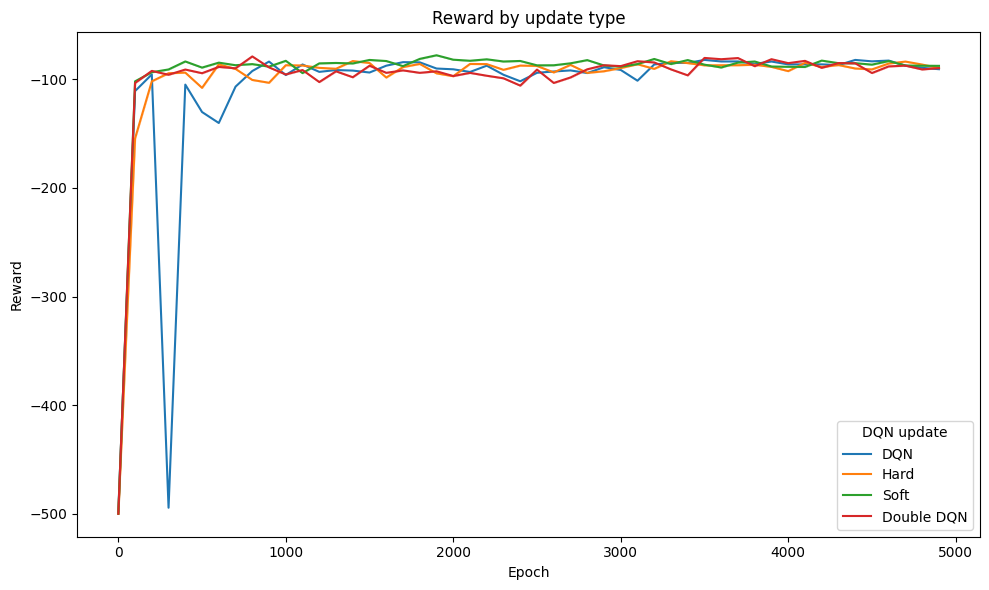

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='epoch', y='reward', hue='algorithm', markers=True)

# Set axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.title('Reward by update type')

# Show legend
plt.legend(title='DQN update')

# Show the plot
plt.tight_layout()
plt.show()

Сравнивая разные подходы направленные на устранение автокорреляции, можно однозначно заключить, что все они работают намного лучше, чем оригинальный DQN. Конкретно для данной среды Double DQN и Soft update показывают чуть лучшие результаты, чем Hard update, но кажется, что эти различия лежат в пределах погрешности.

**Результат**:
* Все методы устранения автокорреляции улучшают DQN.
* Double DQN и Soft update показывают лучшие результаты.